<h1 style="color:#3425ec;"><center><font face="Microsoft Uighur" size="6">بسم الله الرحمن الرحيم</font></center></h1>

<h3 style="color:#2646fc;"><center><font face="Microsoft Uighur" size="6">تمرین درس مدل‌های گرافی احتمالاتی</font></center></h3>
<h3 style="color:#2646fc;direction:rtl;"><center><font face="Microsoft Uighur" size="6"> پیاده‌سازی ICU Alarms به زبان پایتون </font></center></h3>

 
<p style="text-align: right;"><font face="Microsoft Uighur" size="5">
نام و نام خانوادگی : فرزانه فخریان
 </font></p>
<p style="text-align: right;"><font face="Microsoft Uighur" size="5">شماره دانشجویی : 96725008</font></p>

-----

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import pgmpy
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
import sys
from pgmpy import readwrite
from pgmpy.models import BayesianModel
import matplotlib.pyplot as plt


In [38]:
xml = pgmpy.readwrite.BIF.BIFReader('alarm_edited.bif')
data = pd.read_csv('alarm10K.csv', sep=',', header=0, skiprows=0).apply(lambda x: x.astype(str).str.upper())

edges = [tuple(edge) for edge in xml.get_edges()]
model = BayesianModel(edges)

real_model = xml.get_model()
real_state_names = xml.variable_states



In [48]:
KL_MLE = np.zeros(shape=(99,))
KL_BPE_5 = np.zeros(shape=(99,))
KL_BPE_20 = np.zeros(shape=(99,))
KL_BPE_50 = np.zeros(shape=(99,))

for node in list(real_state_names.keys()):
    
    print('node:' + node)
    
    for i in range(501, 5501, 500):
        #print (i//1000)
        train_data = pd.DataFrame(data[1:i])

        MLE_estimator = MaximumLikelihoodEstimator(model=model, data=train_data, state_names=real_state_names,complete_samples_only=True)
        BPE_5_estimator = BayesianEstimator(model=model, data=train_data, state_names=real_state_names,complete_samples_only=True)
        BPE_20_estimator = BayesianEstimator(model=model, data=train_data, state_names=real_state_names,complete_samples_only=True)
        BPE_50_estimator = BayesianEstimator(model=model, data=train_data, state_names=real_state_names,complete_samples_only=True)

        qk = np.asarray(xml.variable_cpds[node])
        qk[qk == 0.0] = 0.0000001

        idx = i//100 - 1
        mle_node_cpd = MLE_estimator.estimate_cpd(node)
        KL_MLE[idx] += np.mean(entropy(qk=qk, pk=np.asarray(mle_node_cpd.get_values())))

        bpe_5_node_cpd = BPE_5_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=5)
        KL_BPE_5[idx] += np.mean(entropy(qk=qk, pk=np.asarray(bpe_5_node_cpd.get_values())))

        bpe_20_node_cpd = BPE_20_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=20)
        KL_BPE_20[idx] += np.mean(entropy(qk=qk, pk=np.asarray(bpe_20_node_cpd.get_values())))

        bpe_50_node_cpd = BPE_50_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=50)
        KL_BPE_50[idx] += np.mean(entropy(qk=qk, pk=np.asarray(bpe_50_node_cpd.get_values())))



node:VENTLUNG
node:HRBP
node:FIO2
node:MINVOLSET
node:DISCONNECT
node:VENTMACH
node:PVSAT
node:STROKEVOLUME
node:VENTALV
node:VENTTUBE
node:KINKEDTUBE
node:EXPCO2
node:PAP
node:CVP
node:HYPOVOLEMIA
node:HR
node:SAO2
node:CO
node:MINVOL
node:ANAPHYLAXIS
node:HREKG
node:PRESS
node:HRSAT
node:BP
node:SHUNT
node:LVEDVOLUME
node:ARTCO2
node:ERRLOWOUTPUT
node:INSUFFANESTH
node:PULMEMBOLUS
node:TPR
node:CATECHOL
node:ERRCAUTER
node:LVFAILURE
node:PCWP
node:HISTORY
node:INTUBATION


In [49]:
KL_MLE = np.append(KL_MLE, [KL_MLE[-1]])
KL_BPE_5 = np.append(KL_BPE_5, [KL_BPE_5[-1]])
KL_BPE_20 = np.append(KL_BPE_20, [KL_BPE_20[-1]])
KL_BPE_50 = np.append(KL_BPE_50, [KL_BPE_50[-1]])


<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5">نتیجه مطابق آنچه که در کتاب گزارش شده است به شکل زیر به دست آمده است. تصویر نتیجه نهایی در فایل نیز موجود است.</font> </p>

<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5">  نتایج به دست آمده و همچنین فایل کامل پروژه در لینک زیر   موجود است. </font> </p>

<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5"> https://github.com/farzanefakhrian/ICU_Alarms </font> </p>

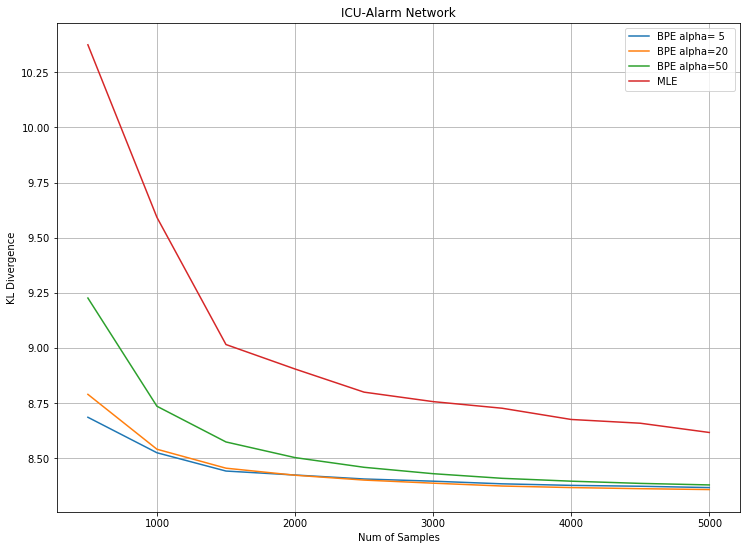

<Figure size 882x648 with 0 Axes>

In [50]:
plt.plot(range(500, 5500, 500), KL_MLE, label='MLE')
plt.plot(range(500, 5500, 500), KL_BPE_5, label='BPE alpha= 5')
plt.plot(range(500, 5500, 500), KL_BPE_20, label='BPE alpha= 20')
plt.plot(range(500, 5500, 500), KL_BPE_50, label='BPE alpha=50')

plt.xlabel('Num of Samples')
plt.ylabel('KL Divergence')
plt.title('ICU-Alarm Network')
plt.grid(True)
plt.legend()
plt.show()

plt.savefig("FinalResults.png")